In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [2]:
# Importing dataset
df=pd.read_csv("C:/Users/sofia/Downloads/Sales_data_zone_wise.csv")
df

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062
5,Month - 6,1534390,1573128,1751825,2292044
6,Month - 7,1820196,1992031,1786826,1688055
7,Month - 8,1625696,1665534,2161754,2363315
8,Month - 9,1652644,1873402,1755290,1422059
9,Month - 10,1852450,1913059,1754314,1608387


In [3]:
df.isnull().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

There are no null values in the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


##### Zone-wise summary statistics

In [5]:
round(df.describe(),3)

,Zone - A,Zone - B,Zone - C,Zone - D
count,29.000,29.000,29.000,29.000
mean,1540493.138,1755559.586,1772871.034,1842926.759
std,261940.062,168389.886,333193.725,375016.479
min,1128185.000,1527574.000,1237722.000,1234311.000
25%,1305972.000,1606010.000,1523308.000,1520406.000
50%,1534390.000,1740365.000,1767047.000,1854412.000
75%,1820196.000,1875658.000,2098463.000,2180416.000
max,2004480.000,2091194.000,2290580.000,2364132.000


Text(0.5, 1.0, 'Zone-wise distribution of sales')

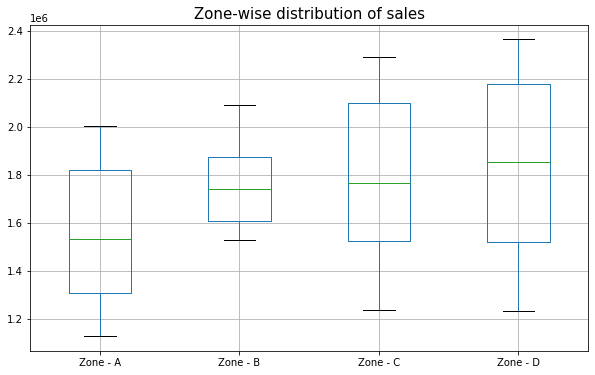

In [6]:
plt.figure(figsize=(10,6))
df.boxplot()
plt.title('Zone-wise distribution of sales',size=15)

##### Mean sales generated by each zone

In [7]:
for i in df.columns[1:5]:
    print('Mean sales of ',i,'is',df[i].mean())

Mean sales of  Zone - A is 1540493.1379310344
Mean sales of  Zone - B is 1755559.5862068965
Mean sales of  Zone - C is 1772871.0344827587
Mean sales of  Zone - D is 1842926.7586206896


C:\Users\sofia\AppData\Local\Temp\ipykernel_12196\2166372778.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean().plot(kind='bar',color='green')


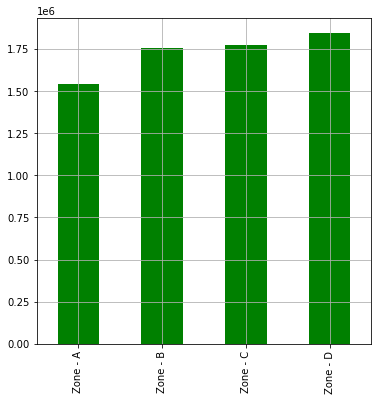

In [8]:
plt.figure(figsize=(6,6))
df.mean().plot(kind='bar',color='green')
plt.grid()

###### Inference :
Average sales for Zone-D is maximum followed by Zone-C, Zone-B and the least for Zone-A

##### Total sales generated by all the zones for each month

In [9]:
df_new=df.copy()
df_new['Total Sales']=df.sum(axis=1)
df_new

C:\Users\sofia\AppData\Local\Temp\ipykernel_12196\2130402380.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_new['Total Sales']=df.sum(axis=1)


,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total Sales
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


Text(0.5, 1.0, 'Total sales for different months')

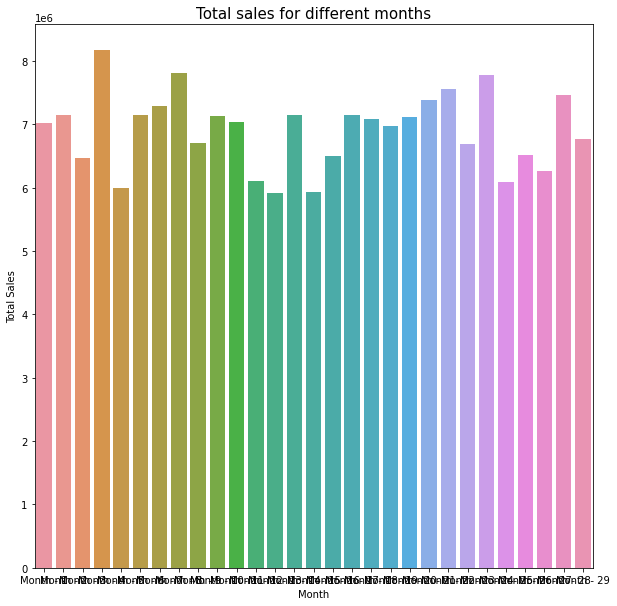

In [10]:
plt.figure(figsize=(10,10))
sns.barplot(x='Month',y='Total Sales',data=df_new)
plt.title('Total sales for different months',size=15)

##### To check whether all zones generate same amount of sales

To check whether same amount of sales was generated by different zones, we test whether the means of data on sales for different zones are equal and this is done using ANOVA test.

Here the hypotheses are

H0 : All zones generate same amount of sales.

H1 : Sales generated by different zones is significantly different.

In [11]:
statistic,p_val=f_oneway(df['Zone - A'],df['Zone - B'],df['Zone - C'],df['Zone - D'])
print('F score=',statistic,'\np value=',p_val,'\n')

alpha  = 0.05       # Significance level
if p_val>=alpha:
    print("We fail to reject H0 based on the sample.\nWe can conclude that all the zones generate same amount of sales.")
else:
    print("There is enough evidence to reject H0 based on the sample.\nThere is significant difference between sales generated by different zones.")

F score= 5.672056106843581 
p value= 0.0011827601694503335 

There is enough evidence to reject H0 based on the sample.
There is significant difference between sales generated by different zones.
